In [16]:
from fastai.imports import *

from fastai.dataset import open_image
from skimage.draw import polygon

from pycocotools.coco import COCO

In [17]:
PATH = Path('../data/coco/')

JPEGS_TRN = 'train2017'
IMG_PATH_TRN = PATH/JPEGS_TRN

JPEGS_VAL = 'val2017'
IMG_PATH_VAL = PATH/JPEGS_VAL

In [7]:
trn_j = json.load((PATH/'annotations/instances_train2017.json').open())
val_j = json.load((PATH/'annotations/instances_val2017.json').open())

In [52]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'
SEGMENTATION, CROWD = 'segmentation','iscrowd'

cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]

val_fns = dict((o[ID], o[FILE_NAME]) for o in val_j[IMAGES])
val_ids = [o[ID] for o in val_j[IMAGES]]

In [6]:
def get_trn_anno():
    trn_anno = collections.defaultdict(lambda:[])
    for o in trn_j[ANNOTATIONS]:
        bb = o[BBOX]
        bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
    return trn_anno

trn_anno = get_trn_anno()

In [48]:
def get_val_anno():
    val_anno = collections.defaultdict(lambda:[])
    for o in val_j[ANNOTATIONS]:
        bb = o[BBOX]
        bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
        val_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
    return val_anno

val_anno = get_val_anno()

In [49]:
val_anno[val_ids[0]]

[(array([240.54, 217.62, 297.29, 255.61]), 44),
 (array([240.24,   1.  , 426.  , 346.63]), 67),
 (array([ 69.92, 388.66, 346.54, 497.07]), 1),
 (array([249.43, 135.57, 277.22, 156.89]), 49),
 (array([344.  ,  31.28, 383.83,  98.4 ]), 51),
 (array([287.36,  59.63, 327.66, 134.7 ]), 51),
 (array([164.33,   1.36, 261.7 , 192.92]), 79),
 (array([262.81,   0.  , 298.58,  61.16]), 1),
 (array([272.51, 119.4 , 305.76, 143.22]), 47),
 (array([267.91, 141.47, 302.77, 172.66]), 47),
 (array([168.95, 155.97, 185.08, 181.  ]), 51),
 (array([114.15, 157.2 , 128.97, 174.06]), 51),
 (array([304.78,  98.75, 309.35, 108.53]), 56),
 (array([256.36, 166.03, 273.94, 173.85]), 50),
 (array([293.97,  86.41, 304.15, 109.37]), 56),
 (array([296.16,  70.14, 299.74,  78.42]), 56),
 (array([210.9 ,   0.  , 308.88, 190.36]), 79),
 (array([297.09,  96.69, 300.95, 103.53]), 57),
 (array([203.4 , 497.25, 231.01, 618.26]), 81)]

# Hotdog prep

In [10]:
cats[58]

'hot dog'

In [12]:
trn_fns[trn_ids[0]]

'000000391895.jpg'

In [18]:
hotdog_ind = np.flatnonzero([58 in set([anno[1] for anno in trn_anno[idx]]) for idx in trn_ids])
not_hotdog_ind = np.setdiff1d(np.arange(len(trn_ids)), hotdog_ind)

In [50]:
hotdog_ind_val = np.flatnonzero([58 in set([anno[1] for anno in val_anno[idx]]) for idx in val_ids])
not_hotdog_ind_val = np.setdiff1d(np.arange(len(val_ids)), hotdog_ind_val)

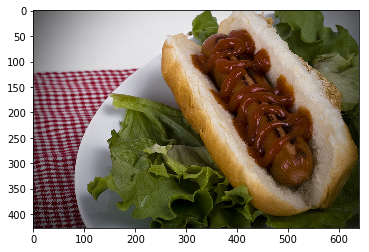

In [25]:
plt.imshow(open_image(IMG_PATH/trn_fns[trn_ids[hotdog_ind[0]]]))

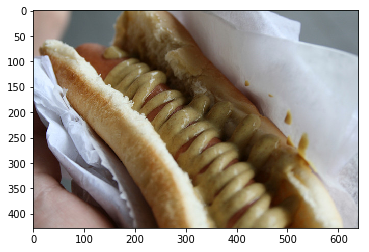

In [51]:
plt.imshow(open_image(IMG_PATH_VAL/val_fns[val_ids[hotdog_ind_val[0]]]))

In [32]:
!mkdir ../data/hotdog

!mkdir ../data/hotdog/images
!mkdir ../data/hotdog/images/train
!mkdir ../data/hotdog/images/val

!mkdir ../data/hotdog/images/train/hotdog
!mkdir ../data/hotdog/images/train/nothotdog

!mkdir ../data/hotdog/images/valid/hotdog
!mkdir ../data/hotdog/images/valid/nothotdog

In [34]:
for idx in hotdog_ind:
    old = IMG_PATH/trn_fns[trn_ids[idx]]
    new = f'../data/hotdog/images/train/hotdog/{trn_fns[trn_ids[idx]]}'
    shutil.copyfile(old, new)

In [36]:
n_pos = len(os.listdir('../data/hotdog/images/train/hotdog/'))

In [43]:
np.random.seed(123)
to_copy = np.random.choice(not_hotdog_ind, n_pos)

In [44]:
for idx in to_copy:
    old = IMG_PATH/trn_fns[trn_ids[idx]]
    new = f'../data/hotdog/images/train/nothotdog/{trn_fns[trn_ids[idx]]}'
    shutil.copyfile(old, new)

In [53]:
for idx in hotdog_ind_val:
    old = IMG_PATH_VAL/val_fns[val_ids[idx]]
    new = f'../data/hotdog/images/valid/hotdog/{val_fns[val_ids[idx]]}'
    shutil.copyfile(old, new)

In [54]:
n_pos_val = len(os.listdir('../data/hotdog/images/valid/hotdog/'))

In [56]:
np.random.seed(123)
to_copy_val = np.random.choice(not_hotdog_ind_val, n_pos_val)

In [58]:
for idx in to_copy_val:
    old = IMG_PATH_VAL/val_fns[val_ids[idx]]
    new = f'../data/hotdog/images/valid/nothotdog/{val_fns[val_ids[idx]]}'
    shutil.copyfile(old, new)

# Dim View

In [4]:
!mkdir ../data/dimview
!mkdir ../data/dimview/images
!mkdir ../data/dimview/masks

!mkdir ../data/dimview/masks/train
!mkdir ../data/dimview/masks/valid

!mkdir ../data/dimview/images/train
!mkdir ../data/dimview/images/valid

In [18]:
coco_trn = COCO(PATH/'annotations/instances_train2017.json')

loading annotations into memory...
Done (t=29.61s)
creating index...
index created!


In [19]:
coco_val = COCO(PATH/'annotations/instances_val2017.json')

loading annotations into memory...
Done (t=3.25s)
creating index...
index created!


In [20]:
person_id = coco_trn.getCatIds(catNms=['person'])
img_ids_trn = coco_trn.getImgIds(catIds=person_id)
img_ids_val = coco_val.getImgIds(catIds=person_id)

In [8]:
len(img_ids_trn)

64115

In [21]:
trn_ims = coco_trn.loadImgs(img_ids_trn)[40000:]

In [22]:
TO_PATH = Path('../data/dimview/images/train')

In [23]:
for im in tqdm(trn_ims):
    FN = im['file_name']
    old = IMG_PATH_TRN/FN
    new = TO_PATH/FN
    shutil.copy(old, new)

100%|██████████| 24115/24115 [12:57<00:00, 31.02it/s]


In [24]:
for im in tqdm(trn_ims):    
    annIds = coco_trn.getAnnIds(imgIds=im['id'], catIds=person_id, iscrowd=None)
    anns = coco_trn.loadAnns(annIds)

    mask = np.zeros((im['height'], im['width']))

    for ann in anns:
        mask += coco_trn.annToMask(ann)
    
    mask = (mask > 0).astype('uint8')
    fn_stem = im['file_name'].split('.')[0]
    cv2.imwrite(f'../data/dimview/masks/train/{fn_stem}.png', mask*255)


100%|██████████| 24115/24115 [03:35<00:00, 111.90it/s]
